# Movie Recommender System

For this project, the plan is to build a movie recommender system based on Content Based Filtering method. Lets briefly see what is a recommender system. 

A movie recommender system is a software application that suggests movies to users based on their preferences, behaviors, or similarities with other users or movies. Its main goal is to help users discover films they are likely to enjoy without having to search manually. It’s widely used on streaming platforms like Netflix, Hulu, Youtube and Amazon Prime to personalize content for each user. Recommender systems come in several types, each with its own approach to making recommendations. Here are the main types:

#### 1. Content-Based Filtering

How it works: Recommends items similar to those you've liked in the past, based on their features (like genre, director, or keywords).

Example:If you liked "The Dark Knight," you might get recommendations for other action movies with similar themes or actors.

#### 2. Collaborative Filtering

How it works: Recommends items based on what other users with similar tastes have liked. It uses the preferences or behaviors of many users to predict what you might like.

Two types:
User-based: 
Looks for users who have similar preferences to you and recommends what they liked.
Item-based: 
Recommends items similar to ones you've liked, based on the preferences of other users.

Example: 
Users who liked the same movies you did, also liked these other movies.

#### 3. Hybrid Recommender System

How it works: Combines multiple recommendation techniques (e.g., content-based + collaborative filtering) to overcome the weaknesses of a single method.

Example: Netflix combines collaborative filtering with content-based filtering to provide more personalized recommendations.

## About the Data

The dataset has been obtained from Kaggle.

Link : https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

It is TMDB dataset. TMDB is a movie database,a community-built online database for movies and TV shows. 

There are 2 files movies.csv and credits.csv. The movies dataset contains all details about a movie like its name, genres, overview, popularity, revenue, vote_count and more. The credits dataset contains detils about cast and crew. The dataset has information about 4803 movies. 

The main objective of this project is to combine all the details of a movie into one single tagline and create a Content Based Recommender System that can take in a movie tile and display set of movies similar to it. 


## Exploring the Data

In [151]:
# Loading libraries
import numpy as np 
import pandas as pd
import ast
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import nltk
import re

warnings.filterwarnings("ignore")

In [138]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv') 

In [139]:
movies.shape

(4803, 20)

In [140]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [141]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Cast and Crew contains data about all the people worked to produce a film. 

In [142]:
credits.head(1)['cast'].values

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

In [143]:
credits.head(1)['crew'].values

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

In [144]:
# merging both the datasets
df = pd.merge(movies, credits, left_on='id', right_on='movie_id', how='inner')

In [184]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,weighted_rating,tags
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.1,"In the 22nd century, a paraplegic Marine is di..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.7,"Captain Barbossa, long believed to be dead, ha..."


In [185]:
df.shape

(4803, 26)

In [186]:
# these are the features we have 
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew', 'weighted_rating',
       'tags'],
      dtype='object')

### Calculate Weighted Rating

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.So we will calculate weighted rating. 

To calculate a weighted rating using vote average and vote count, we use the formula:

Weighted Rating (WR) = (v / (v + m)) * R + (m / (v + m)) * C

Where:
v is the number of votes for the item (vote_count).
m is the minimum votes required to be listed in the chart.
R is the average rating of the item (vote_average).
C is the mean vote across the whole report.

In [187]:
# Calculate C (mean vote across the whole report)
C = df['vote_average'].mean()

# Calculate m (minimum votes required to be listed in the chart)
m = df['vote_count'].quantile(0.90) 

# function to calculate the weighted rating
def weighted_rating(row, m=m, C=C):
    v = row['vote_count']
    R = row['vote_average']
    # Calculation based on the IMDB formula
    return round((v / (v + m) * R) + (m / (v + m) * C),1)

# Apply the function to each row of the DataFrame
df['weighted_rating'] = df.apply(weighted_rating, axis=1)

In [188]:
#Sort movies based on weighted_rating calculated above
df_score = df.sort_values('weighted_rating', ascending=False)

#Print the top 15 movies
df_score[['title_y', 'vote_count', 'vote_average', 'weighted_rating']].head(10)

,title_y,vote_count,vote_average,weighted_rating
1881,The Shawshank Redemption,8205,8.5,8.1
3337,The Godfather,5893,8.4,7.9
65,The Dark Knight,12002,8.2,7.9
96,Inception,13752,8.1,7.9
662,Fight Club,9413,8.3,7.9
3232,Pulp Fiction,8428,8.3,7.9
95,Interstellar,10867,8.1,7.8
809,Forrest Gump,7927,8.2,7.8
329,The Lord of the Rings: The Return of the King,8064,8.1,7.7
262,The Lord of the Rings: The Fellowship of the Ring,8705,8.0,7.7


We have made our first basic recommender system based on rating. Lets find movies based on budget and popularity. 

Text(0.5, 1.0, 'High budget Movies')

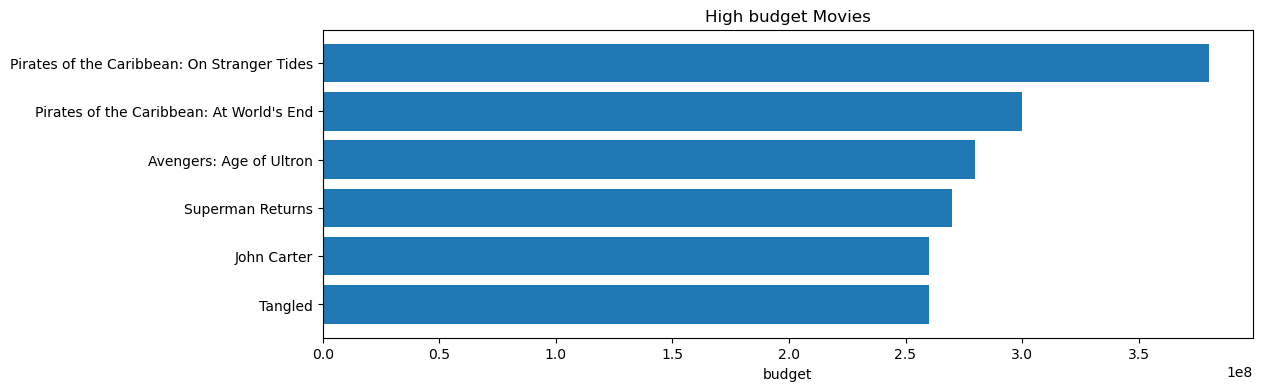

In [189]:
#top movie picks based on budget
budget= df.sort_values('budget', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(budget['title_y'].head(6),budget['budget'].head(6), align='center')
plt.gca().invert_yaxis()
plt.xlabel("budget")
plt.title("High budget Movies")

Text(0.5, 1.0, 'Popular Movies')

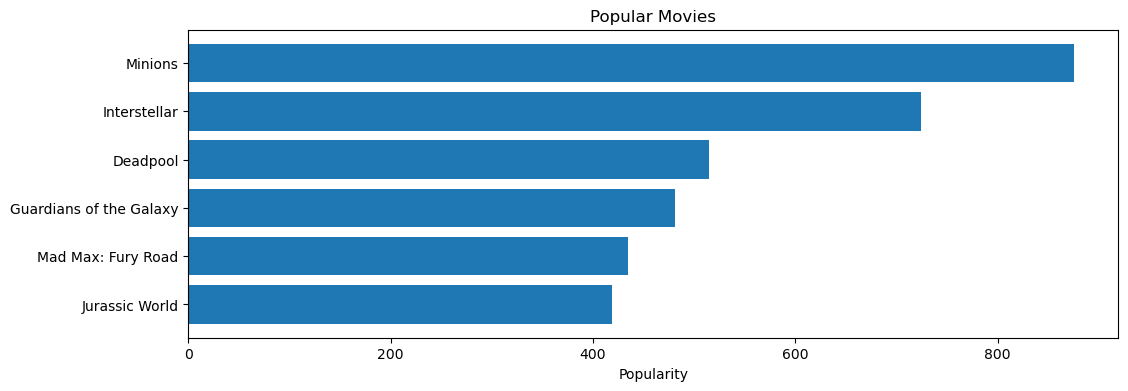

In [190]:
#top movie picks based on popularity
popularity= df.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(popularity['title_y'].head(6),popularity['popularity'].head(6), align='center')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

The above plots shows a basic recommender systems called demographic filtering. These are recommender systems based on rating, budget and popularity. Now lets try to build a Content Based Recommender system. Lets try to build using overview. 

## Content Based Recommender System using overview

In [191]:
# df with title and overview
df_overview = df[['title_y','overview']]
movie_display_df = new_df[['title_y','genres','weighted_rating']]
# checking for nulls
df_overview.isnull().sum()

title_y     0
overview    3
dtype: int64

In [192]:
df_overview.dropna(inplace = True)

In [193]:
df_overview['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [194]:
# Define TfidfVectorizer and removing stop words 
tfidf = TfidfVectorizer(stop_words = 'english')
# Replacing Nan's
df_overview['overview'] = df_overview['overview'].fillna(' ')

# tfidf matrix 
tfidf_matrix = tfidf.fit_transform(df_overview['overview'])
tfidf_matrix.shape


(4800, 20978)

In [195]:
# cosine_similarity matrix
cos_sim = cosine_similarity(tfidf_matrix)
cos_sim.shape

(4800, 4800)

In [196]:
# recommendations based on overview
def recommend_overview(movie):
    index = df_overview[df_overview['title_y'] == movie].index[0]
    similarities = cos_sim[index]
    indices = np.argpartition(similarities, -6)[-6:]
    results = movie_display_df.iloc[indices].iloc[::-1]
    return results

In [197]:
recommend_overview('Avatar')

,title_y,genres,weighted_rating
0,Avatar,"Action, Adventure, Fantasy, ScienceFiction",7.1
2130,The American,"Crime, Drama, Thriller",6.0
3604,Apollo 18,"Horror, Thriller, ScienceFiction",5.9
634,The Matrix,"Action, ScienceFiction",7.6
1341,The Inhabited Island,"Action, Fantasy, ScienceFiction, Thriller",6.1
529,Tears of the Sun,"Action, Drama, War",6.2


In [198]:
recommend_overview('Inception')

,title_y,genres,weighted_rating
96,Inception,"Action, Thriller, ScienceFiction, Mystery, Adv...",7.9
2897,Cypher,"Thriller, ScienceFiction, Mystery",6.1
134,Mission: Impossible - Rogue Nation,"Action, Adventure, Thriller",6.7
1930,Stone Cold,"Action, Crime, Thriller",6.1
914,Central Intelligence,"Action, Comedy",6.1
1683,Pitch Perfect 2,"Comedy, Music",6.5


In the above system we are using only overview to get movie recommendations. Now, we will go through all the feature use overview, cast, crew, genres etc., to bulid our recommender system. This will help us increase the credibility of our system. 

## Data Cleaning And Organizing 

In [199]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew', 'weighted_rating',
       'tags'],
      dtype='object')

In [200]:
# lets see original_language
df['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [201]:
# These are the features we plan to use to create a tagline 
df = df[['movie_id','title_y','overview','genres','keywords','cast','crew','weighted_rating']]

In [202]:
df.head()

,movie_id,title_y,overview,genres,keywords,cast,crew,weighted_rating
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.1
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.7
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.2
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.3
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1


In [203]:
# checking for nulls
df.isnull().sum()

movie_id           0
title_y            0
overview           3
genres             0
keywords           0
cast               0
crew               0
weighted_rating    0
dtype: int64

In [204]:
df.dropna(inplace = True)

In [205]:
# checking for duplicates 
df.duplicated().sum()

0

In [206]:
# coverting the info contained in each feature to a format meaningful to us
df.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [207]:
# function to covert genres and keywords into a list
def convert(text):
    result_list = []
    for i in ast.literal_eval(text):
        result_list.append(i['name']) 
    return result_list 

In [208]:
df['genres'] = df['genres'].apply(convert)

In [209]:
df.head()

,movie_id,title_y,overview,genres,keywords,cast,crew,weighted_rating
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.1
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.7
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.2
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.3
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1


In [210]:
df['keywords'] = df['keywords'].apply(convert)

In [211]:
# function to extract first five actors in a movie
def convert_limit5(text):
    result_list = []
    for i in ast.literal_eval(text):
        if len(result_list) < 5:
            result_list.append(i['name'])
        else: 
            break
    return result_list 
    

In [212]:
df['cast'] = df['cast'].apply(convert_limit5)

In [213]:
df['cast'][1]

['Johnny Depp',
 'Orlando Bloom',
 'Keira Knightley',
 'Stellan Skarsgård',
 'Chow Yun-fat']

In [214]:
# function to extract dirctor of the movie
def director(text):
    director = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            director.append(i['name'])
    return director

In [215]:
df['crew'] = df['crew'].apply(director)

In [216]:
df['overview'] = df['overview'].apply(lambda x:x.split())

In [217]:
df.head()

,movie_id,title_y,overview,genres,keywords,cast,crew,weighted_rating
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],7.1
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],6.7
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],6.2
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],7.3
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],6.1


In [218]:
#removing spaces between items in the list
df['genres'] = df['genres'].apply(lambda x:[i.replace(" ","")for i in x])
df['keywords'] = df['keywords'].apply(lambda x:[i.replace(" ","")for i in x])
df['cast'] = df['cast'].apply(lambda x:[i.replace(" ","")for i in x])
df['crew'] = df['crew'].apply(lambda x:[i.replace(" ","")for i in x])

In [219]:
#combining all features that helps to create a tagline for each movie
df['tags'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']

In [229]:
new_df = df[['movie_id','title_y','tags','genres','weighted_rating']]

In [230]:
new_df.head(3)

,movie_id,title_y,tags,genres,weighted_rating
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]",7.1
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]",6.7
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]",6.2


In [231]:
#converting tags list into a paragraph
new_df['tags'] = new_df['tags'].apply(lambda x:" " .join(x))

In [232]:
new_df['genres'] = new_df['genres'].apply(lambda x:", " .join(x))

In [233]:
#converting tags list into lowercase
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

In [234]:
new_df.head()

,movie_id,title_y,tags,genres,weighted_rating
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di...","Action, Adventure, Fantasy, ScienceFiction",7.1
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha...","Adventure, Fantasy, Action",6.7
2,206647,Spectre,a cryptic message from bond’s past sends him o...,"Action, Adventure, Crime",6.2
3,49026,The Dark Knight Rises,following the death of district attorney harve...,"Action, Crime, Drama, Thriller",7.3
4,49529,John Carter,"john carter is a war-weary, former military ca...","Action, Adventure, ScienceFiction",6.1


In [239]:
new_df['tags'][0]

'22nd century , paraplegic marine dispatched moon pandora unique mission , becomes torn following order protecting alien civilization . action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez jamescameron'

In [240]:
# removing frequent used words like the, is, a 
stop_words = set(stopwords.words("english"))
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token for token in tokens if token not in stop_words]
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token) for token in stopwords_removed]
    return ' '.join(lemmatized)
new_df['tags'] = new_df['tags'].apply(preprocess_text)

In [241]:
#converting similar word like (live,lived,living) into single word live
porter_stemmer = PorterStemmer()
def stemmer(text):
    result_text = []
    for i in text.split():
        result_text.append(porter_stemmer.stem(i))
    return " ".join(result_text)
        
new_df['tags'] = new_df['tags'].apply(stemmer)    

## Building Content Based Recommender System using all possible features 

To buid this recommender system we use movie's overview, cast, crew, keyword etc., to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

In [242]:
movie_display_df = new_df[['title_y','genres','weighted_rating']]

In [246]:
# converting text into sparse matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
vector = cv.fit_transform(new_df['tags']).toarray()

In [247]:
vector.shape

(4800, 33454)

In [248]:
cv.get_feature_names_out()

array(['00', '000', '007', ..., '张立', '绝地奶霸', '超级妈妈'], dtype=object)

In [249]:
#similarity with other movies
similarity = cosine_similarity(vector)

In [250]:
similarity.shape

(4800, 4800)

In [251]:
similarity

array([[1.        , 0.06333005, 0.06333005, ..., 0.05057217, 0.01838658,
        0.        ],
       [0.06333005, 1.        , 0.06818182, ..., 0.0362977 , 0.        ,
        0.        ],
       [0.06333005, 0.06818182, 1.        , ..., 0.0362977 , 0.        ,
        0.        ],
       ...,
       [0.05057217, 0.0362977 , 0.0362977 , ..., 1.        , 0.04742231,
        0.02986405],
       [0.01838658, 0.        , 0.        , ..., 0.04742231, 1.        ,
        0.04885968],
       [0.        , 0.        , 0.        , ..., 0.02986405, 0.04885968,
        1.        ]])

In [252]:
# function thet helps to display 5 similar movies
def recommend(movie):
    index = new_df[new_df['title_y'] == movie].index[0]
    similarities = similarity[index]
    indices = np.argpartition(similarities, -6)[-6:]
    results = movie_display_df.iloc[indices].iloc[::-1]
    return results

In [253]:
recommend('Gandhi')

,title_y,genres,weighted_rating
3227,The Wind That Shakes the Barley,"Drama, History, War",6.2
2024,Gandhi,"Drama, History",6.5
3645,"Gandhi, My Father","Drama, Foreign, History",6.1
1747,A Passage to India,"Drama, Adventure, History",6.1
4384,Guiana 1838,Drama,6.1
2936,Barry Lyndon,"Drama, Romance, War",6.4


In [254]:
recommend('The Dark Knight Rises')

,title_y,genres,weighted_rating
65,The Dark Knight,"Drama, Action, Crime, Thriller",7.9
3,The Dark Knight Rises,"Action, Crime, Drama, Thriller",7.3
119,Batman Begins,"Action, Crime, Drama",7.2
428,Batman Returns,"Action, Fantasy",6.3
1359,Batman,"Fantasy, Action",6.6
299,Batman Forever,"Action, Crime, Fantasy",5.7


In [255]:
# widget to create interactive textbox 

import ipywidgets as widgets
from IPython.display import display

movie_input = widgets.Text(
    #value='Avatar',
    description='Movie Title:',
    disabled=False
)
movie_list = widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            display(recommend1(title))

movie_input.observe(on_type, names='value')


display(movie_input, movie_list)

Text(value='', description='Movie Title:')

Output()

## Conclusion

Content based recommendation system is certainly good if we want to recommend suggestions based on features like genres, actors, overview etc.. The accuracy of content based filtering enhances when we use fields such as genres, cast, crews which provide more in depth information about the user’s likes. The most basic form of recommendation system is based on Demographic filtering which just makes use of fields like popularity, budget and revenue, these fields don’t provide any specific information which could help us in determining the preferences/likes of user. Some limitations of content based filtering are that it can only make recommendations based on existing interests of the user, it does not consider the fact that what do other users think of an item, thus low quality item recommendations may occur sometimes.

Github URL: https://github.com/umavish/Movie_Recommender_system

I would like to mention some refereces that I learned from

https://github.com/campusx-official/movie-recommender-system-tmdb-dataset/blob/main/notebook86c26b4f17.ipynb

https://www.kaggle.com/rounakbanik/movie-recommender-systems

https://medium.com/web-mining-is688-spring-2021/content-based-movie-recommendation-system-72f122641eab